## Unsupervised Machine Learning: Clustering Songs

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df_audio = pd.read_csv('df_audio_features_1000.csv/df_audio_features_1000.csv')

In [10]:
df_audio.drop(columns={'mode', 'key', 'speechiness', 'liveness', 'time_signature', 'duration_ms'}, inplace=True)

In [12]:
df_audio.set_index(["name","artist"], inplace=True)

In [13]:
df_audio

,,danceability,energy,loudness,acousticness,instrumentalness,valence,tempo
name,artist,,,,,,,
Don't Be Cruel,Elvis Presley,0.6970,0.55000,-11.496,0.856,0.000034,0.8440,84.802
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.5850,0.24700,-12.612,0.452,0.000009,0.5910,127.150
Smoke Gets In Your Eyes,The Platters,0.2900,0.22700,-13.060,0.944,0.000079,0.2240,114.278
"What'd I Say, Pt. 1 & 2",Ray Charles,0.5400,0.68100,-5.440,0.808,0.000000,0.7940,88.385
Dream A Little Dream Of Me,Ella Fitzgerald,0.4550,0.16700,-13.613,0.918,0.000000,0.4040,76.118
...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,-23.390,0.917,0.715000,0.0655,87.906
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,-21.873,0.855,0.426000,0.0355,83.134
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,-42.959,0.951,0.969000,0.0344,71.573


#### Min-Max-Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
minmax.fit(df_audio)

MinMaxScaler()

In [15]:
df_scaled = minmax.transform(df_audio)

In [17]:
df_scaled = pd.DataFrame(df_scaled, columns=df_audio.columns, index=df_audio.index)

In [22]:
df_scaled.reset_index().drop({'name', 'artist'}, axis=1)

,danceability,energy,loudness,acousticness,instrumentalness,valence,tempo
0,0.704777,0.552200,0.723440,0.859437,0.000035,0.853947,0.224187
1,0.580938,0.247977,0.698907,0.453814,0.000009,0.591879,0.494567
2,0.254755,0.227896,0.689059,0.947791,0.000081,0.211726,0.412383
3,0.531181,0.683728,0.856565,0.811245,0.000000,0.802155,0.247063
4,0.437196,0.167654,0.676903,0.921687,0.000000,0.398177,0.168742
...,...,...,...,...,...,...,...
1382,0.157452,0.069660,0.461981,0.920683,0.725888,0.047545,0.244005
1383,0.141973,0.101387,0.495329,0.858433,0.432487,0.016470,0.213537
1384,0.000000,0.000913,0.031808,0.954819,0.983756,0.015330,0.139723
1385,0.081159,0.020864,0.328922,0.886546,0.512690,0.040916,0.111222


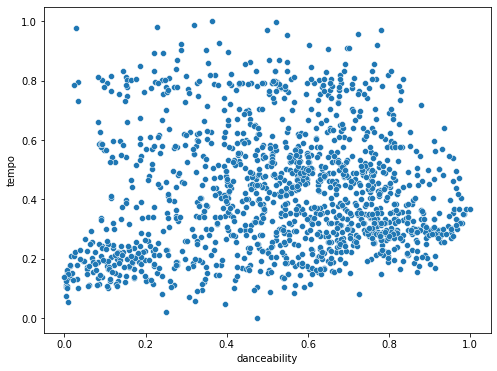

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x='danceability', y='tempo')
plt.show()

#### Robust-Scaling

In [37]:
from sklearn.preprocessing import RobustScaler
robustscale = RobustScaler()
robustscale.fit(df_audio)

RobustScaler()

In [38]:
df_rob_scale = robustscale.transform(df_audio)

In [40]:
df_rob_scale = pd.DataFrame(df_rob_scale, columns=df_audio.columns, index=df_audio.index)

In [42]:
df_rob_scale.reset_index().drop({'name', 'artist'}, axis=1)

,danceability,energy,loudness,acousticness,instrumentalness,valence,tempo
0,0.381791,0.012245,-0.319657,0.581299,-0.000536,0.709931,-0.559226
1,0.052863,-0.606122,-0.444085,0.066288,-0.000724,0.212389,0.380056
2,-0.813510,-0.646939,-0.494035,0.693480,-0.000203,-0.509341,0.094554
3,-0.079295,0.279592,0.355558,0.520110,-0.000790,0.611603,-0.479755
4,-0.328928,-0.769388,-0.555692,0.660335,-0.000790,-0.155359,-0.751838
...,...,...,...,...,...,...,...
1382,-1.071953,-0.968571,-1.645780,0.659060,5.275963,-0.821042,-0.490379
1383,-1.113069,-0.904082,-1.476642,0.580024,3.143122,-0.880039,-0.596223
1384,-1.490162,-1.108306,-3.827628,0.702403,7.150502,-0.882203,-0.852647
1385,-1.274596,-1.067755,-2.320660,0.615718,3.726148,-0.833628,-0.951659


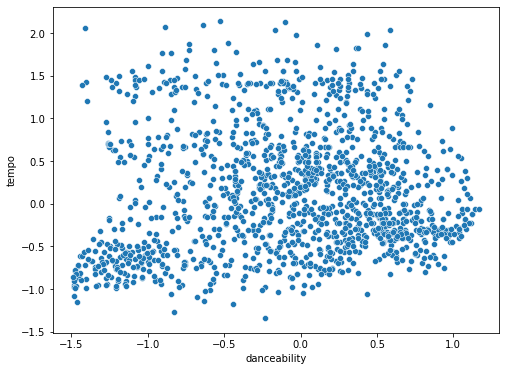

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df_rob_scale, x='danceability', y='tempo')
plt.show()

#### K-means: Creating clusters

In [46]:
from sklearn.cluster import KMeans

In [68]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(df_scaled)

KMeans(n_clusters=10)

In [69]:
kmeans.cluster_centers_

array([[0.63322281, 0.78168876, 0.84200379, 0.09344281, 0.0184379 ,
        0.71554238, 0.63864204],
       [0.28312469, 0.14595249, 0.58296226, 0.9314139 , 0.0607435 ,
        0.17032814, 0.34149157],
       [0.1411594 , 0.10321774, 0.46503481, 0.91727015, 0.85676926,
        0.0489913 , 0.26642222],
       [0.64293311, 0.60283841, 0.78633405, 0.59257546, 0.02381571,
        0.84811896, 0.492141  ],
       [0.71188475, 0.62213865, 0.82347187, 0.16911452, 0.00224438,
        0.43030212, 0.36073396],
       [0.79166508, 0.69525328, 0.83299738, 0.14706354, 0.00671314,
        0.79108624, 0.32928284],
       [0.55965281, 0.81277856, 0.81803269, 0.04674388, 0.79286168,
        0.52531334, 0.64974198],
       [0.41332667, 0.27921025, 0.60929116, 0.86224175, 0.83575471,
        0.31376191, 0.46093969],
       [0.54301845, 0.37009111, 0.73093605, 0.73084629, 0.027623  ,
        0.49113443, 0.40091516],
       [0.40961882, 0.75761071, 0.850331  , 0.07858372, 0.02589807,
        0.26223634, 0.5

In [83]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
cl_pos

,danceability,energy,loudness,acousticness,instrumentalness,valence,tempo
0,0.633223,0.781689,0.842004,0.093443,0.018438,0.715542,0.638642
1,0.283125,0.145952,0.582962,0.931414,0.060744,0.170328,0.341492
2,0.141159,0.103218,0.465035,0.917270,0.856769,0.048991,0.266422
3,0.642933,0.602838,0.786334,0.592575,0.023816,0.848119,0.492141
4,0.711885,0.622139,0.823472,0.169115,0.002244,0.430302,0.360734
5,0.791665,0.695253,0.832997,0.147064,0.006713,0.791086,0.329283
6,0.559653,0.812779,0.818033,0.046744,0.792862,0.525313,0.649742
7,0.413327,0.279210,0.609291,0.862242,0.835755,0.313762,0.460940
8,0.543018,0.370091,0.730936,0.730846,0.027623,0.491134,0.400915
9,0.409619,0.757611,0.850331,0.078584,0.025898,0.262236,0.563713


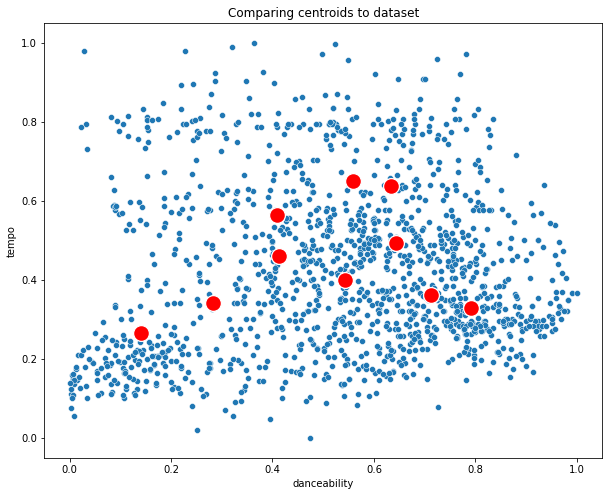

In [84]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Comparing centroids to dataset')
plt.xlabel('danceability')
plt.ylabel('tempo')
sns.scatterplot(data=df_scaled, x='danceability', y='tempo')
sns.scatterplot(data=cl_pos, x='danceability', y='tempo', color='red', s=250)
plt.show()

In [72]:
clusters = kmeans.predict(df_scaled)

In [73]:
clusters

array([3, 8, 1, ..., 2, 2, 2])

In [74]:
df_scaled["cluster"] = clusters
# df_scaled.drop({'cluster'}, axis=1, inplace=True)
df_scaled

,,danceability,energy,loudness,acousticness,instrumentalness,valence,tempo,cluster
name,artist,,,,,,,,
Don't Be Cruel,Elvis Presley,0.704777,0.552200,0.723440,0.859437,0.000035,0.853947,0.224187,3
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.580938,0.247977,0.698907,0.453814,0.000009,0.591879,0.494567,8
Smoke Gets In Your Eyes,The Platters,0.254755,0.227896,0.689059,0.947791,0.000081,0.211726,0.412383,1
"What'd I Say, Pt. 1 & 2",Ray Charles,0.531181,0.683728,0.856565,0.811245,0.000000,0.802155,0.247063,3
Dream A Little Dream Of Me,Ella Fitzgerald,0.437196,0.167654,0.676903,0.921687,0.000000,0.398177,0.168742,1
...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.157452,0.069660,0.461981,0.920683,0.725888,0.047545,0.244005,2
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.141973,0.101387,0.495329,0.858433,0.432487,0.016470,0.213537,2
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.000000,0.000913,0.031808,0.954819,0.983756,0.015330,0.139723,2


This plot is very good for sampling several combinations. Dancibility and tempo were not the best combination for clustering. Energy and acousticness seems to be better...

Plot for dancibility and tempo:

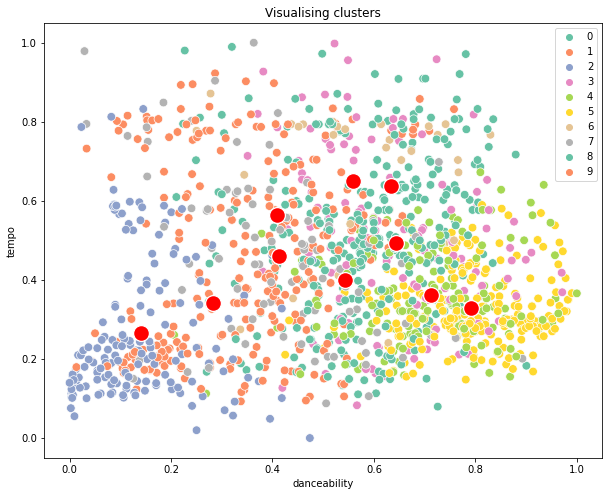

In [88]:
plot_data = pd.DataFrame(df_scaled)
plot_data.columns = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'cluster']
plot_data['cluster'] = kmeans.labels_

fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel('danceability')
plt.ylabel('tempo')

sns.scatterplot(data=plot_data, x='danceability', y='tempo', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='danceability', y='tempo', color='red', s=250)
plt.show()

Plot for energy and acousticness:

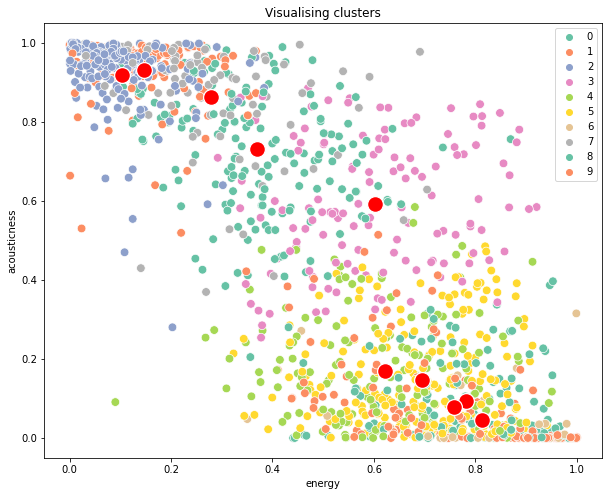

In [87]:
plot_data = pd.DataFrame(df_scaled)
plot_data.columns = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'cluster']
plot_data['cluster'] = kmeans.labels_

fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel('energy')
plt.ylabel('acousticness')

sns.scatterplot(data=plot_data, x='energy', y='acousticness', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='energy', y='acousticness', color='red', s=250)
plt.show()